In [1]:
#building campus recruitment machine learning model

In [2]:
#important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loading the dataset
df=pd.read_csv('C:\\USers\sojore\Documents\campus recruitment\Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
#eploring the dataset
df.groupby('degree_t')['degree_t'].agg('count')

degree_t
Comm&Mgmt    145
Others        11
Sci&Tech      59
Name: degree_t, dtype: int64

In [5]:
df.groupby('specialisation')['specialisation'].agg('count')

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [6]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
df.salary.mean()

288655.4054054054

In [8]:
import math
median_val=math.floor(df.salary.mean())
x=float(median_val)
x
df.salary=df.salary.fillna(x)
df.salary.unique()

array([270000., 200000., 250000., 288655., 425000., 252000., 231000.,
       260000., 218000., 300000., 236000., 265000., 393000., 360000.,
       240000., 350000., 278000., 320000., 411000., 287000., 204000.,
       450000., 216000., 220000., 268000., 275000., 336000., 230000.,
       500000., 400000., 210000., 420000., 380000., 280000., 276000.,
       940000., 225000., 233000., 690000., 340000., 255000., 285000.,
       290000., 650000., 264000., 295000.])

In [9]:
df.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


In [10]:
df.groupby('degree_t')['degree_t'].agg('count').sort_values(ascending=False)

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

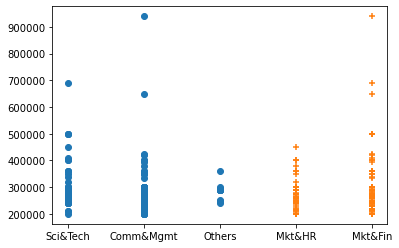

In [11]:
plt.scatter(df.degree_t,df.salary)
plt.scatter(df.specialisation,df.salary,marker='+')

In [12]:
df.head(1)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed,270000.0


In [13]:
df['ssc_p2']=df['ssc_p']**2
df['hsc_p2']=df['hsc_p']**2
df['degree_p2']=df['degree_p']**2
df['etest_p2']=df['etest_p']**2
df['mba_p2']=df['mba_p']**2
df.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,ssc_p2,hsc_p2,degree_p2,etest_p2,mba_p2
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,4489.0000,8281.0000,3364.0000,3025.00,3457.4400
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,6293.2489,6135.5889,6003.1504,7482.25,4393.0384
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,4225.0000,4624.0000,4096.0000,5625.00,3340.8400


In [14]:
#outlier detection and filtering
df1=df.copy()
ll1=df1.ssc_p2.quantile(0.01)
ul1=df1.ssc_p2.quantile(0.99)
df1[(df1.ssc_p2<=ll1) | (df1.ssc_p2>=ul1)]
df2=df1[(df1.ssc_p2>ll1) & (df1.ssc_p2<ul1)]
df2.shape

(207, 20)

In [15]:
ll2=df2.hsc_p2.quantile(0.01)
ul2=df2.hsc_p2.quantile(0.99)
df2[(df2.hsc_p2<=ll2) | (df2.hsc_p2>=ul2)]
df3=df2[(df2.hsc_p2>ll2) & (df2.hsc_p2<ul2)]
df3.shape

(201, 20)

In [16]:
ll3=df2.degree_p2.quantile(0.01)
ul3=df2.degree_p2.quantile(0.99)
df3[(df3.degree_p2<=ll3) | (df3.degree_p2>=ul3)]
df4=df3[(df3.degree_p2>ll3) & (df3.degree_p2<ul3)]
df4.shape

(195, 20)

In [17]:
ll4=df4.etest_p2.quantile(0.01)
ul4=df4.etest_p2.quantile(0.99)
df4[(df4.etest_p2<=ll4) | (df4.etest_p2>=ul4)]
df5=df4[(df4.etest_p2>ll4) & (df4.etest_p2<ul4)]
df5.shape

(190, 20)

In [18]:
ll5=df5.mba_p2.quantile(0.01)
ul5=df5.mba_p2.quantile(0.99)
df5[(df5.mba_p2<=ll5) | (df5.mba_p2>=ul5)]
df6=df5[(df5.mba_p2>ll5) & (df5.mba_p2<ul5)]
df6.shape

(186, 20)

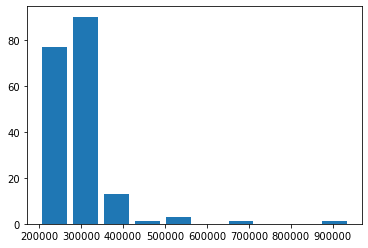

In [19]:
plt.hist(df6.salary,rwidth=0.8)
plt.show()

In [20]:
df6['salary_per_hsc_p']=df6['salary']/df6['hsc_p']
df6.sample(3)

<ipython-input-20-da5229e8bd35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['salary_per_hsc_p']=df6['salary']/df6['hsc_p']


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,ssc_p2,hsc_p2,degree_p2,etest_p2,mba_p2,salary_per_hsc_p
169,170,M,59.96,Others,42.16,Others,Science,61.26,Sci&Tech,No,...,Mkt&HR,65.48,Not Placed,288655.0,3595.2016,1777.4656,3752.7876,2968.0704,4287.6304,6846.655598
205,206,M,61.00,Others,62.00,Others,Commerce,65.00,Comm&Mgmt,No,...,Mkt&Fin,56.81,Placed,250000.0,3721.0000,3844.0000,4225.0000,3844.0000,3227.3761,4032.258065
125,126,F,84.00,Central,73.00,Central,Commerce,73.00,Comm&Mgmt,No,...,Mkt&Fin,73.33,Placed,350000.0,7056.0000,5329.0000,5329.0000,5625.0000,5377.2889,4794.520548


In [21]:
ll6=df6.salary_per_hsc_p.quantile(0.01)
ul6=df6.salary_per_hsc_p.quantile(0.99)
df6[(df6.salary_per_hsc_p<=ll6) | (df6.salary_per_hsc_p>=ul6)]
df7=df6[(df6.salary_per_hsc_p>ll6) & (df6.salary_per_hsc_p<ul6)]
df7.shape

(182, 21)

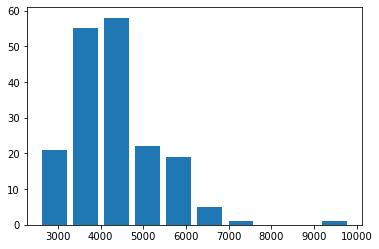

In [22]:
plt.hist(df7.salary_per_hsc_p,rwidth=0.8)
plt.show()

In [23]:
#this is kinda a normal distribution

In [24]:
df7.head(1)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,ssc_p2,hsc_p2,degree_p2,etest_p2,mba_p2,salary_per_hsc_p
0,1,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,...,Mkt&HR,58.8,Placed,270000.0,4489.0,8281.0,3364.0,3025.0,3457.44,2967.032967


In [25]:
#droping unneccesary columns
df8=df7.drop(['ssc_p2','hsc_p2','degree_p2','etest_p2','mba_p2','salary_per_hsc_p','sl_no'],axis='columns')
df8.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.0
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,288655.0


In [26]:
df8.groupby('status')['status'].agg('count')

status
Not Placed     54
Placed        128
Name: status, dtype: int64

In [27]:
#converting categorical data into numerical values using replace function
df8.gender=df8.gender.replace(['M','F'],[1,0])
df8.ssc_b=df8.ssc_b.replace(['Central','Others'],[1,0])
df8.hsc_b=df8.hsc_b.replace(['Central','Others'],[1,0])
df8.workex=df8.workex.replace(['Yes','No'],[1,0])
df8.specialisation=df8.specialisation.replace(['Mkt&Fin','Mkt&HR'],[1,0])
df8.status=df8.status.replace(['Not Placed','Placed'],[1,0])
df8.sample(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
59,1,52.6,1,65.58,0,Science,72.11,Sci&Tech,0,57.60,1,56.66,0,265000.0
97,0,70.5,1,62.50,0,Commerce,61.00,Comm&Mgmt,0,93.91,1,69.03,1,288655.0
141,1,66.0,1,64.00,1,Science,60.00,Comm&Mgmt,0,60.00,0,61.90,1,288655.0
47,1,63.0,1,60.00,1,Commerce,57.00,Comm&Mgmt,1,78.00,1,54.55,0,204000.0
157,1,66.5,1,62.50,1,Commerce,60.90,Comm&Mgmt,0,93.40,1,55.03,0,300000.0


In [28]:
#using label encoder to get dummy variables for columns 'hsc_s' and 'degree_t'

In [30]:
from sklearn.preprocessing import LabelEncoder
le_hsc=LabelEncoder()
le_degree=LabelEncoder()
df8['hsc_s']=le_hsc.fit_transform(df8.hsc_s)
df8['degree_t']=le_degree.fit_transform(df8.degree_t)
df8.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,0,91.00,0,1,58.00,2,0,55.0,0,58.80,0,270000.0
1,1,79.33,1,78.33,0,2,77.48,2,1,86.5,1,66.28,0,200000.0
2,1,65.00,1,68.00,1,0,64.00,0,0,75.0,1,57.80,0,250000.0
3,1,56.00,1,52.00,1,2,52.00,2,0,66.0,0,59.43,1,288655.0
5,1,55.00,0,49.80,0,2,67.25,2,1,55.0,1,51.58,1,288655.0


In [32]:
df8.shape

(182, 14)

In [33]:
X=df8.drop('salary',axis='columns')
X.shape

(182, 13)

In [34]:
y=df8.salary
y.head(3)

0    270000.0
1    200000.0
2    250000.0
Name: salary, dtype: float64

In [35]:
#splitting the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [36]:
X_train.shape

(145, 13)

In [37]:
len(X_test)

37

In [39]:
##creating a machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [40]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,2,3],
                'kernel':['linear','rbf']
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{}
        }
    }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [41]:
find_best_model_using_gridsearchcv(X_train,y_train)

C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

,model,best_score,best_params
0,linear_regression,0.118677,{'normalize': False}
1,lasso,0.118785,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,-0.353941,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,svm,0.331034,"{'C': 3, 'kernel': 'rbf'}"
4,random_forest,0.351724,{}
5,logistic_regression,0.351724,{}


In [42]:
#the perfomance is poor since of the incomplete dataset on the target column(only filled the missing values with mean value)
#from the above im gonna use logistic_regression to build my model
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred=model.predict(X_test)
y_pred[:5]

array([240000., 360000., 300000., 288655., 250000.])

In [44]:
y_test[:5]

113    280000.0
81     300000.0
78     270000.0
161    288655.0
76     230000.0
Name: salary, dtype: float64

Text(159.0, 0.5, 'Truth')

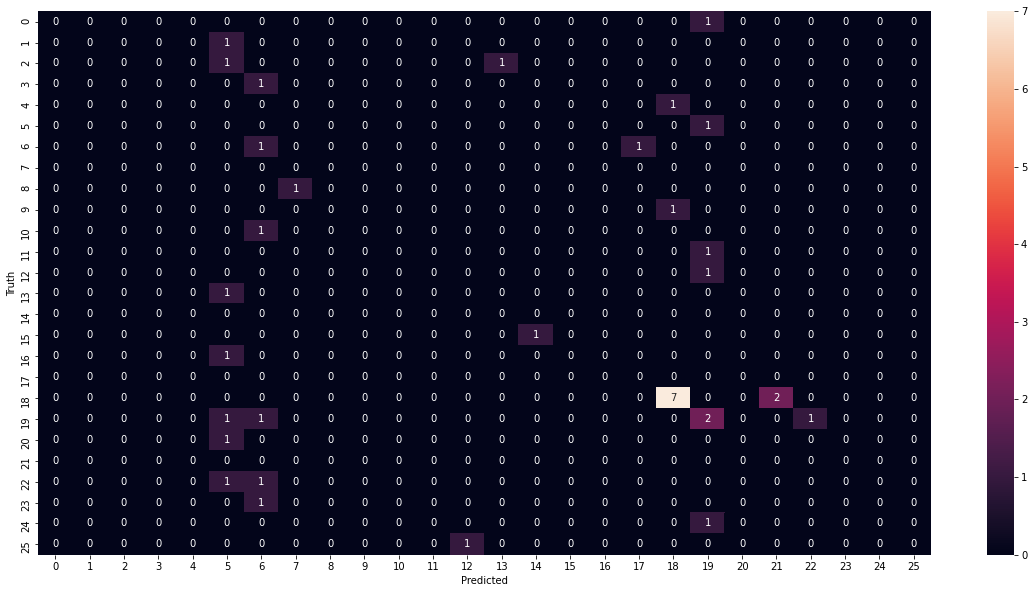

In [46]:
#next i will create a heatmap for a better visualization of the predicted results
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(20,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
#my model is doing pretty good on doing the predictions
#next i can print a classification report
print('Classification Report: \n',classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

    200000.0       0.00      0.00      0.00         1
    204000.0       0.00      0.00      0.00         1
    220000.0       0.00      0.00      0.00         2
    230000.0       0.00      0.00      0.00         1
    236000.0       0.00      0.00      0.00         1
    240000.0       0.00      0.00      0.00         1
    250000.0       0.17      0.50      0.25         2
    252000.0       0.00      0.00      0.00         0
    260000.0       0.00      0.00      0.00         1
    264000.0       0.00      0.00      0.00         1
    265000.0       0.00      0.00      0.00         1
    268000.0       0.00      0.00      0.00         1
    270000.0       0.00      0.00      0.00         1
    275000.0       0.00      0.00      0.00         1
    276000.0       0.00      0.00      0.00         0
    278000.0       0.00      0.00      0.00         1
    280000.0       0.00      0.00      0.00         1
  

C:\Users\sojore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sojore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
